# Notebook to loop through the available datasets and check they load OK

In [1]:
import sys
import os
sys.path.append(os.path.join(str(os.getcwd()),'../'))
import intake_aodn
import intake

In [2]:
from intake_aodn.utils import get_local_cluster
client = get_local_cluster()
client

<Client: 'tcp://127.0.0.1:8786' processes=4 threads=8, memory=28.00 GiB>

In [3]:
dsets = []
for entry in intake_aodn.cat.aodn_s3:
    print(entry)
    ds=intake_aodn.cat.aodn_s3[entry](startdt='2021-01-01',
                                      enddt='2021-03-01',
                                      cropto=dict(latitude=-32.,longitude=115.,method='nearest')).read()
    dsets.append(ds)

SST_L3S_1d_ngt
MODIS_1d_chl_oc3
MODIS_1d_chl_gsm
MODIS_1d_K_490


In [7]:
import xarray as xr
ds = xr.merge(dsets,compat='override')

In [8]:
ds

<xarray.Dataset>
Dimensions:                  (time: 117)
Coordinates:
  * time                     (time) datetime64[ns] 2021-01-01T05:30:00 ... 20...
    latitude                 float32 -32.01
    longitude                float32 115.0
Data variables:
    dt_analysis              (time) float32 nan nan nan 0.4487 ... nan nan nan
    l2p_flags                (time) float32 nan nan nan ... nan nan nan
    quality_level            (time) float32 nan nan nan 2.0 ... nan nan nan nan
    satellite_zenith_angle   (time) float32 nan nan nan 67.63 ... nan nan nan
    sea_surface_temperature  (time) float32 nan nan nan 295.0 ... nan nan nan
    sses_bias                (time) float32 nan nan nan -0.9479 ... nan nan nan
    sses_count               (time) float32 nan nan nan 1.08 ... nan nan nan nan
    sses_standard_deviation  (time) float32 nan nan nan 0.8542 ... nan nan nan
    sst_dtime                (time) float64 nan nan nan ... nan nan nan
    chl_oc3                  (time) float32 nan nan nan nan ... nan nan nan
    chl_gsm                  (time) float32 nan nan nan nan ... nan nan nan
    K_490                    (time) float32 nan nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    HRPT AVHRR experimental L3 retrieval produced...
    ...                         ...
    summary:                    Skin SST retrievals produced from stitching t...
    time_coverage_end:          20210101T151752Z
    time_coverage_start:        20210101T095824Z
    title:                      IMOS L3S Nighttime gridded multiple-sensor mu...
    uuid:                       4d02ee75-876d-4ff0-8956-ab68917c9001
    westernmost_longitude:      70.01000213623047

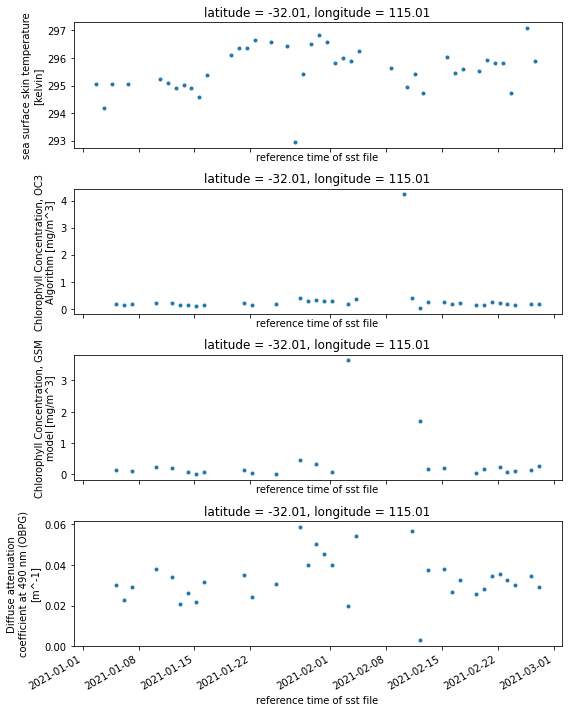

In [21]:
import matplotlib.pyplot as plt
variables = ['sea_surface_temperature','chl_oc3','chl_gsm','K_490']
fig, axs = plt.subplots(len(variables),1,sharex=True,figsize=(8,10))
for i,v in enumerate(variables):
    ds[v].plot(ax=axs[i],marker='.')
fig.tight_layout()